In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/crop-soil.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


### Analyzing Data Distribution

Examine the distribution of the categorical and numerical features to understand the data spread and identify potential outliers or patterns.

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

print("Distribution of Categorical Features:")
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())

print("\nDistribution of Numerical Features:")
display(df[numerical_cols].describe())

Distribution of Categorical Features:

Value counts for Soil Type:


,count
Soil Type,
Clayey,1623
Black,1613
Red,1594
Loamy,1590
Sandy,1580



Value counts for Crop Type:


,count
Crop Type,
Sugarcane,763
Maize,753
Wheat,747
Ground Nuts,732
Pulses,728
Cotton,722
Millets,718
Tobacco,717
Oil seeds,711



Value counts for Fertilizer Name:


,count
Fertilizer Name,
14-35-14,1188
Urea,1170
DAP,1167
10-26-26,1128
17-17-17,1124
28-28,1120
20-20,1103



Distribution of Numerical Features:


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000


### Visualizing Data Distributions

Let's visualize the distributions of the numerical and categorical features using histograms and bar plots to gain a better understanding of the data.

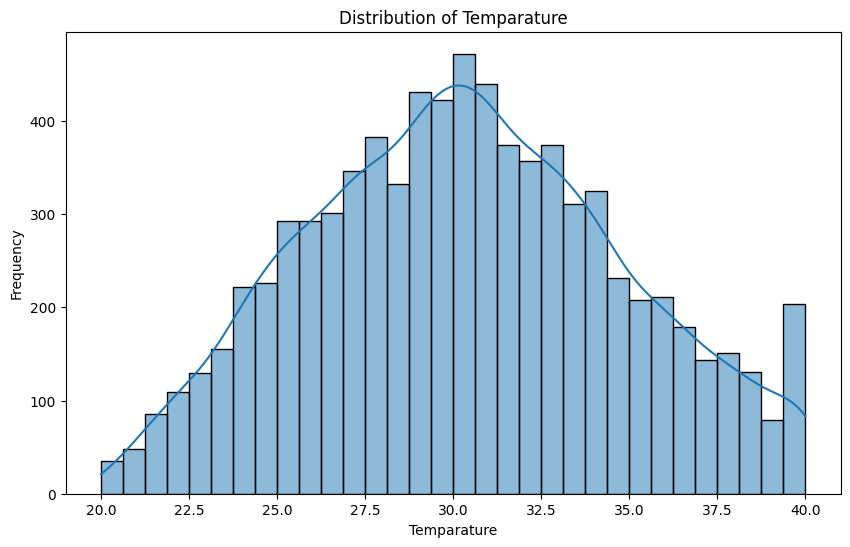

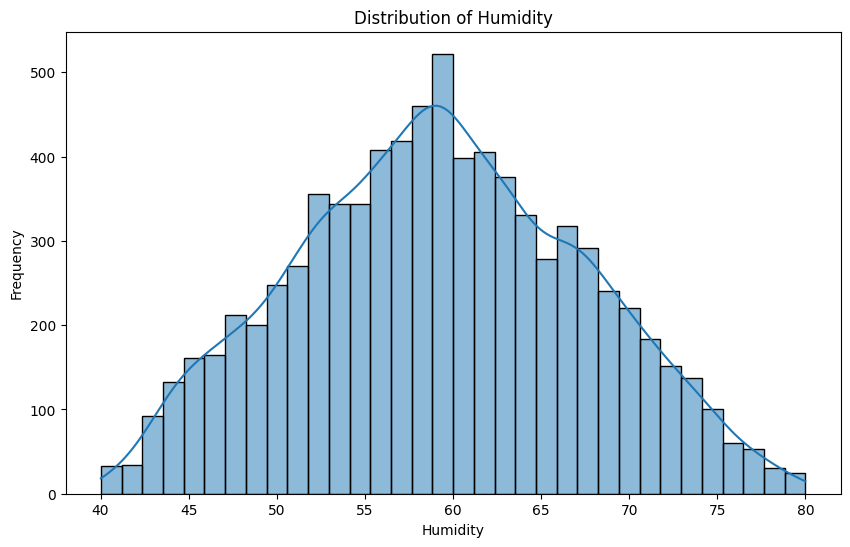

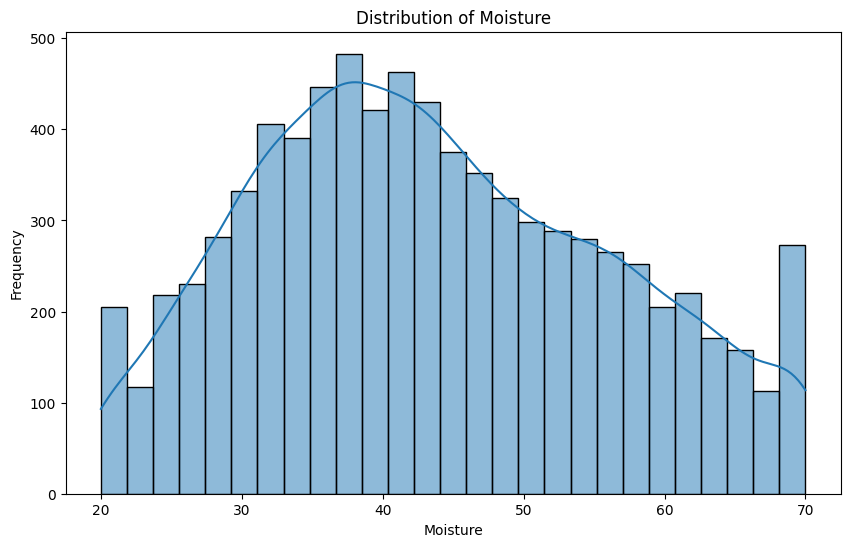

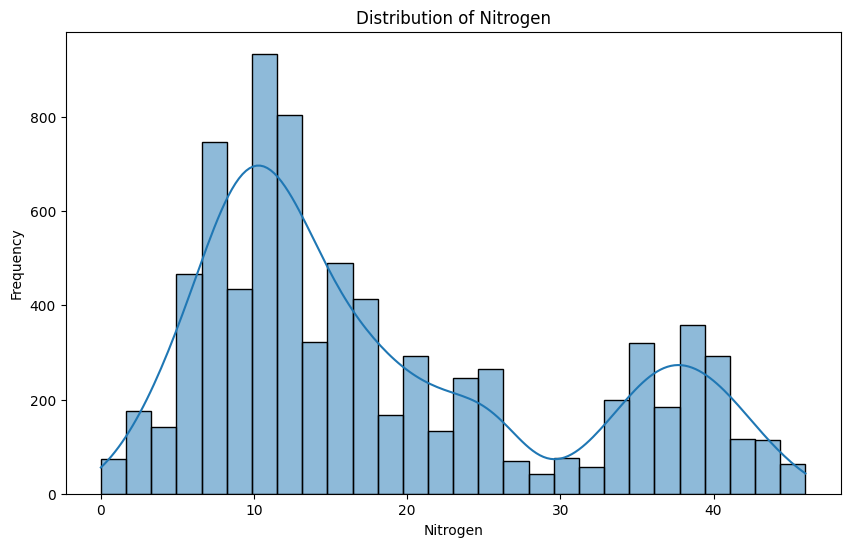

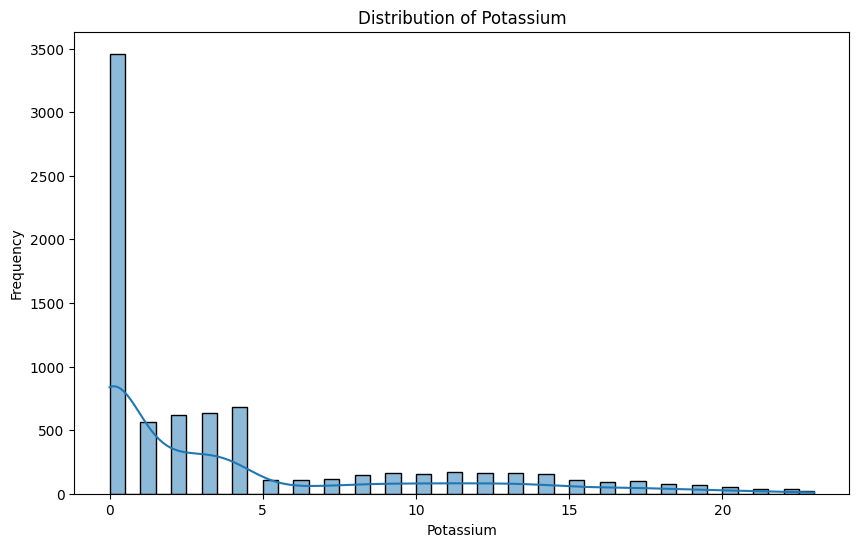

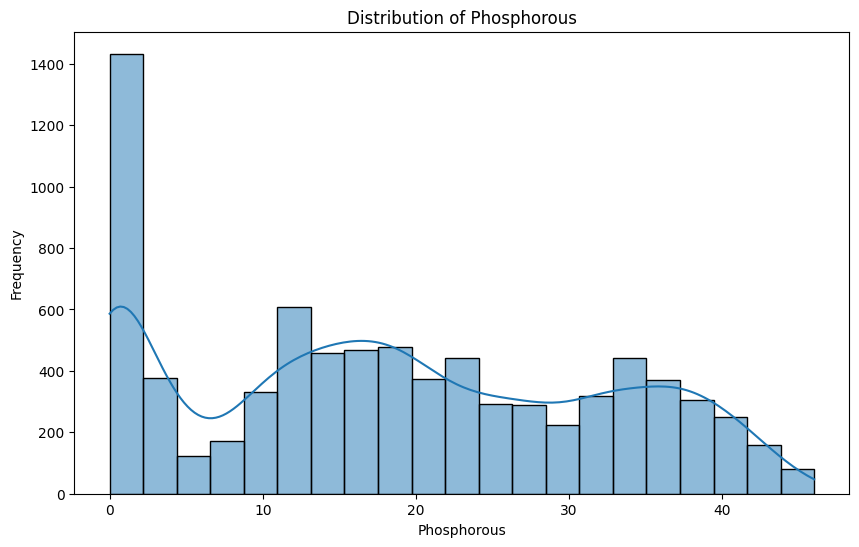

In [ ]:
# distributions of numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

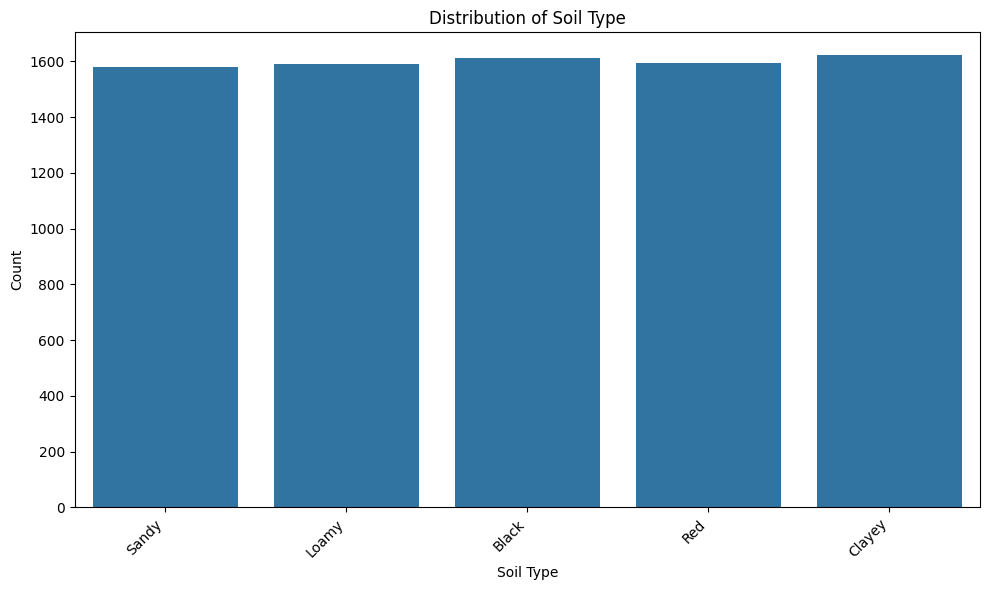

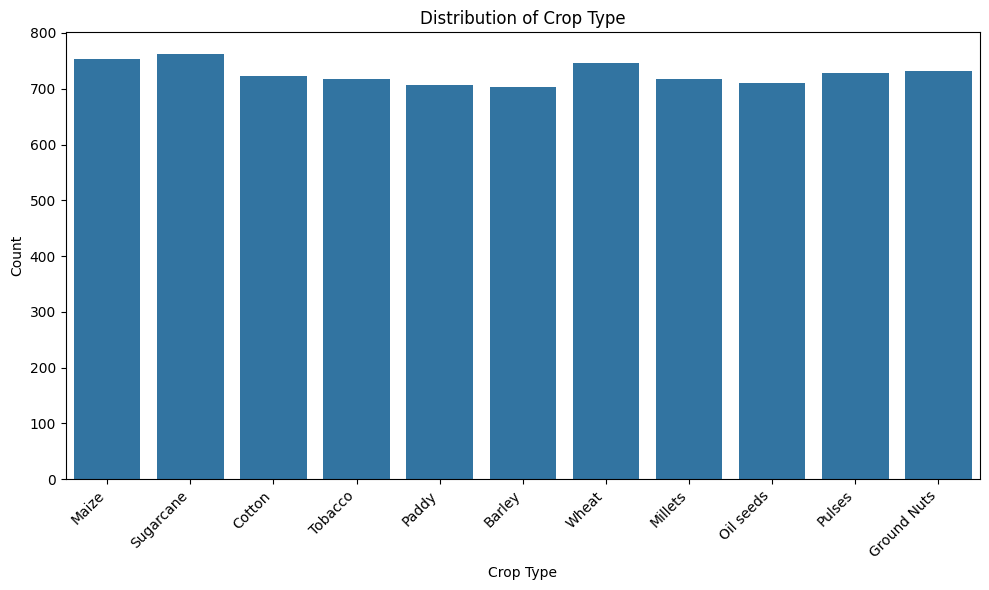

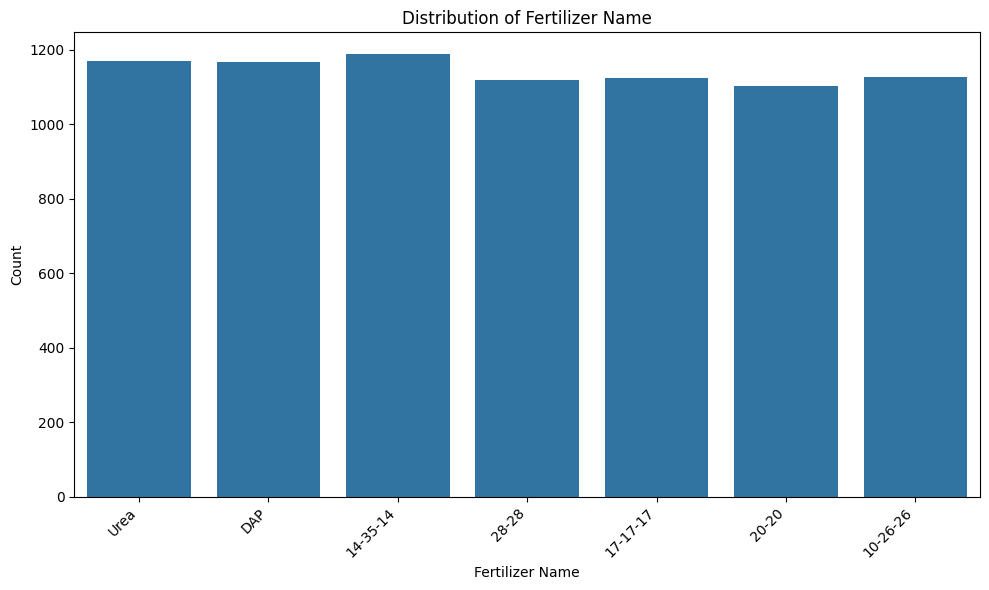

In [ ]:
# distributions of categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Analyzing Relationships Between Features

Examine the relationships between the numerical and categorical features using correlation heatmaps and box plots.

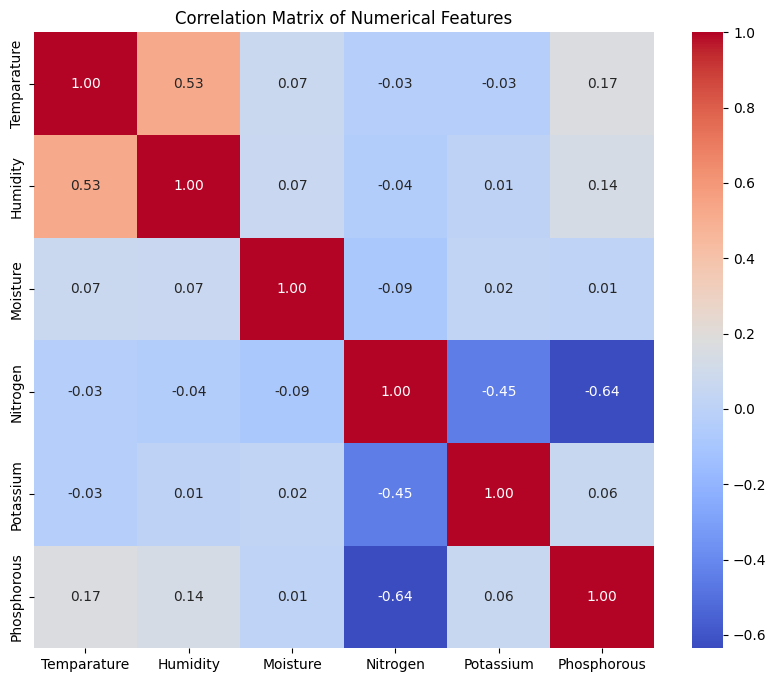

In [ ]:
# correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

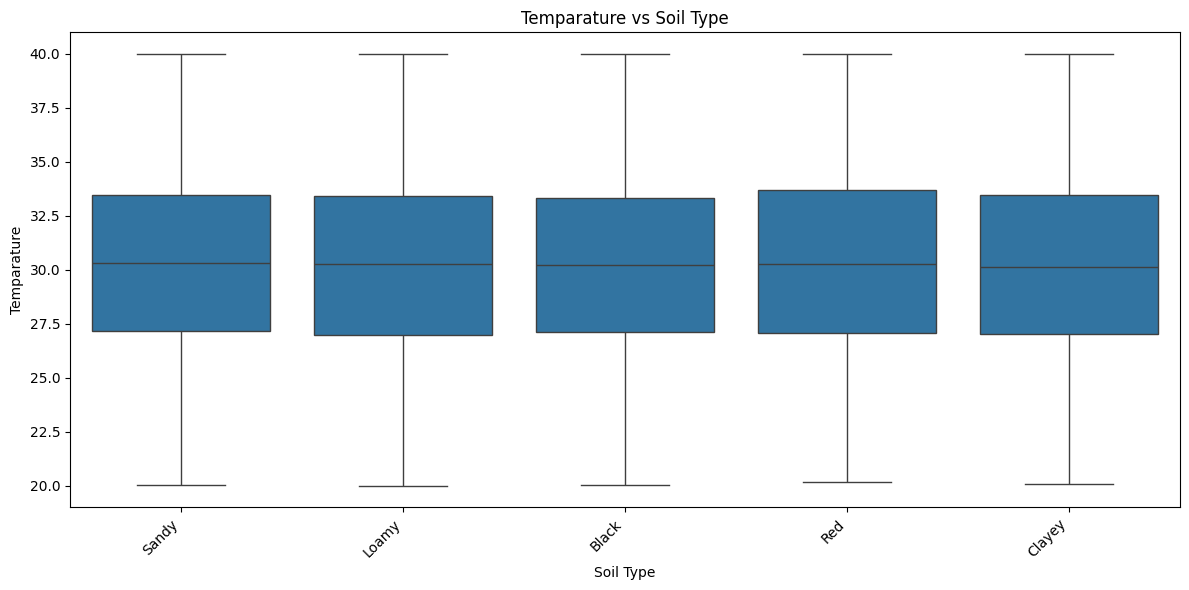

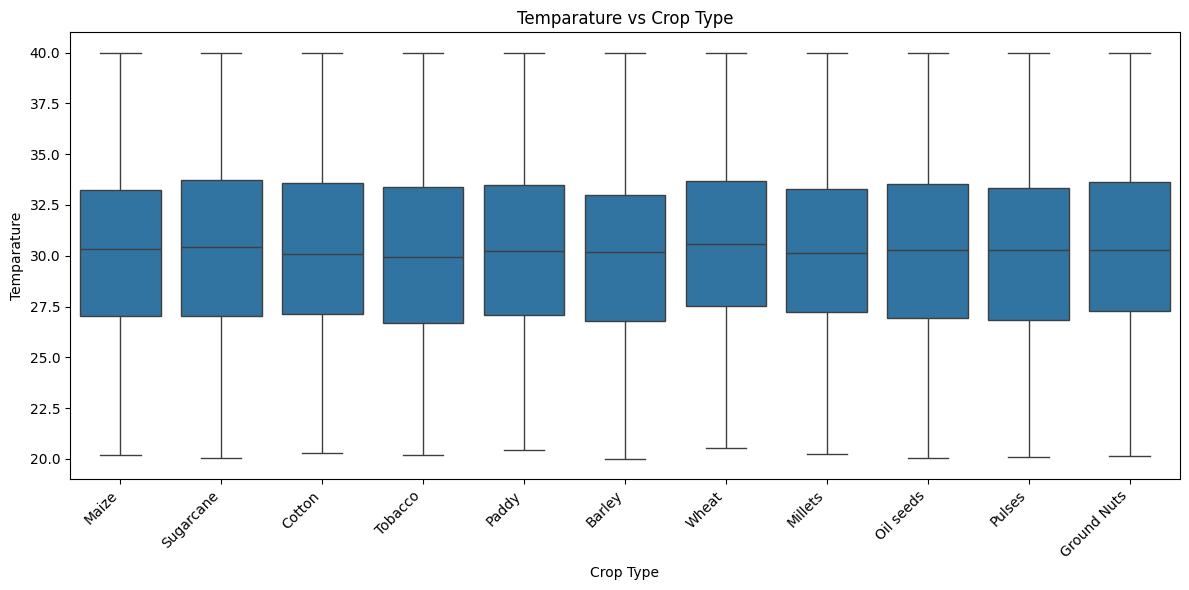

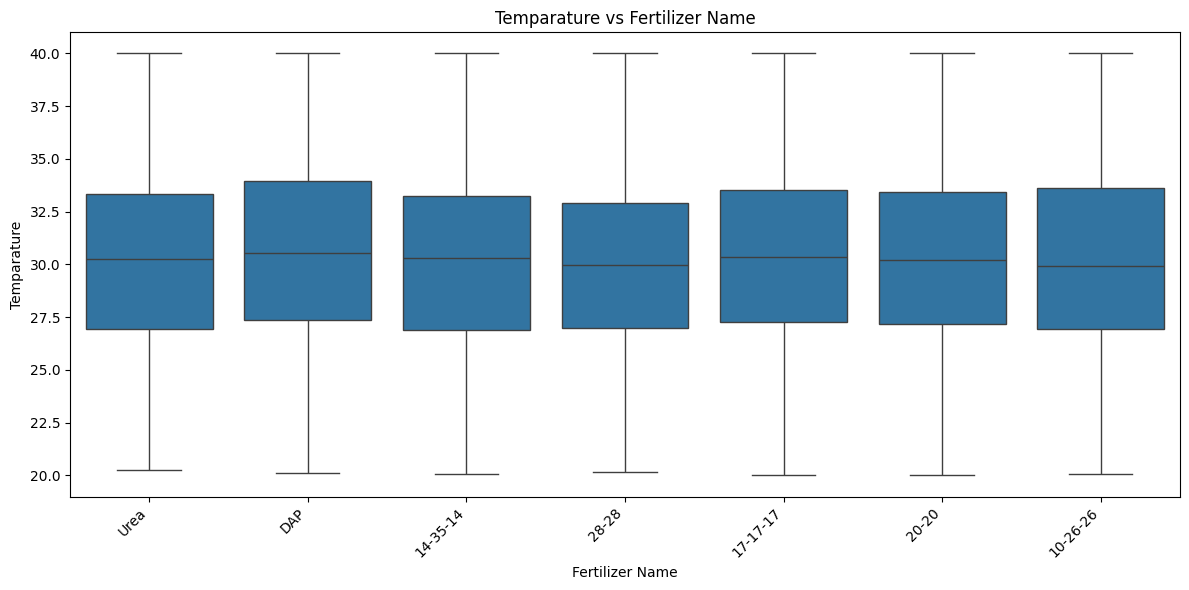

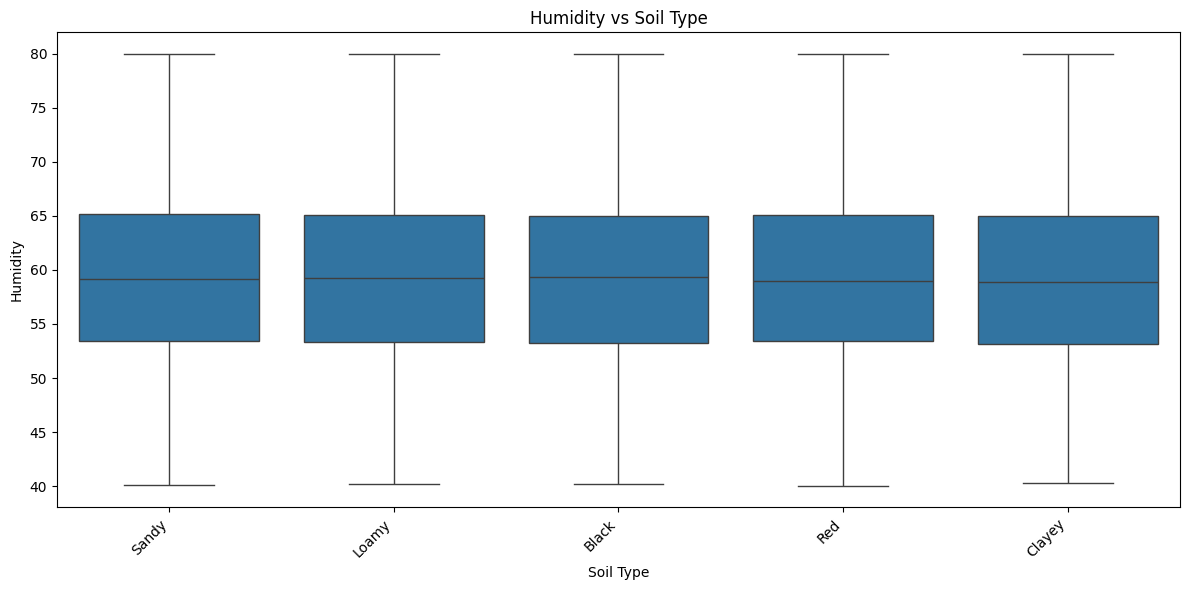

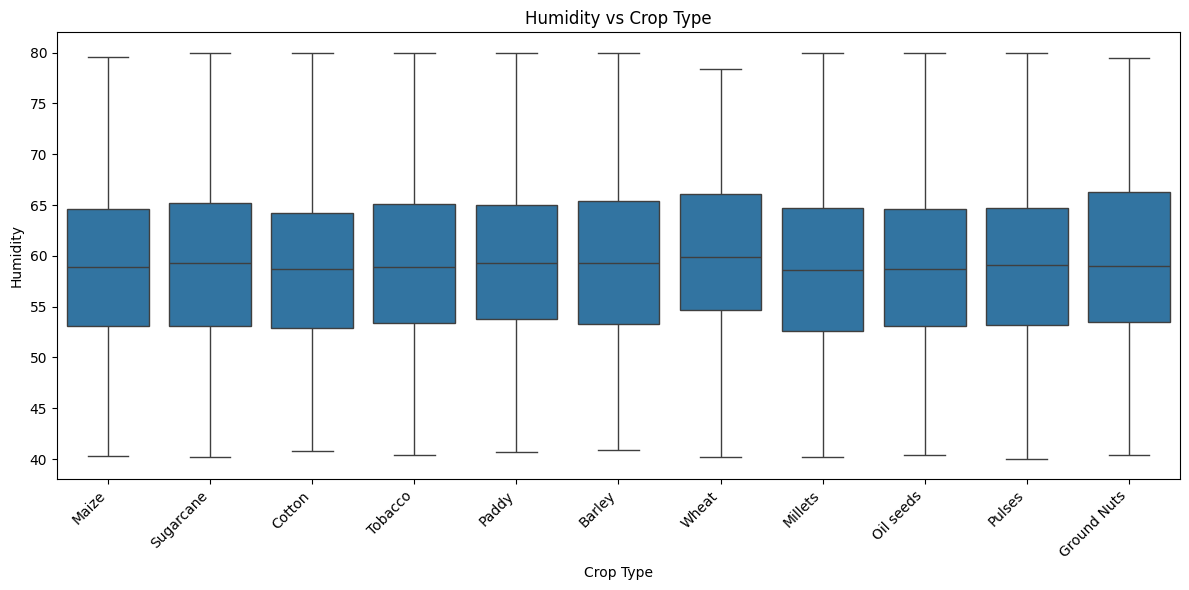

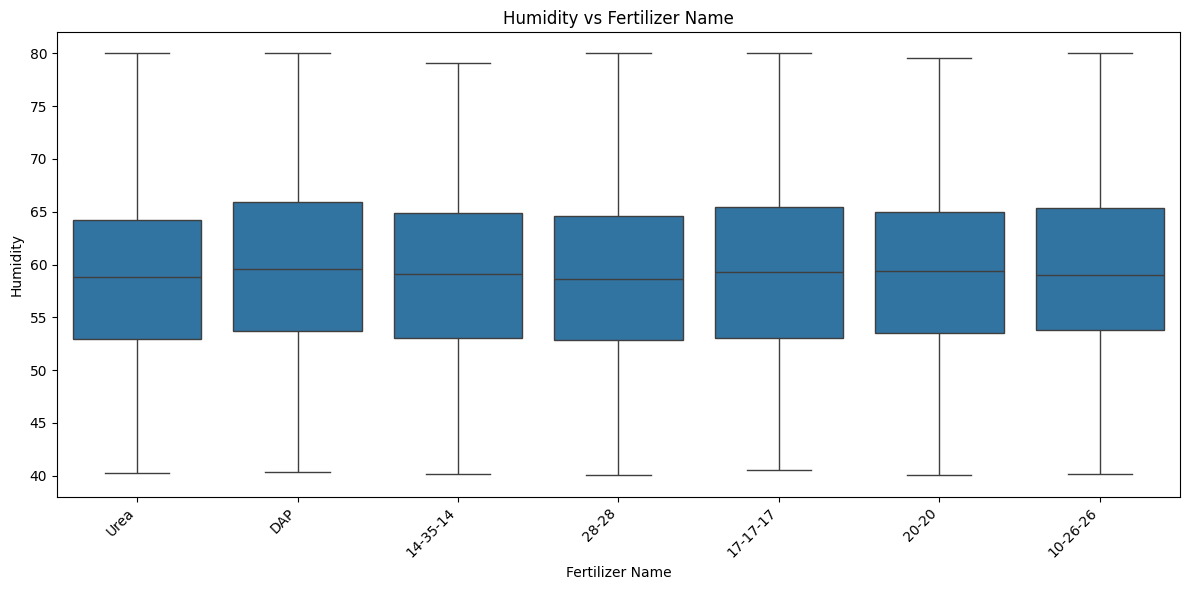

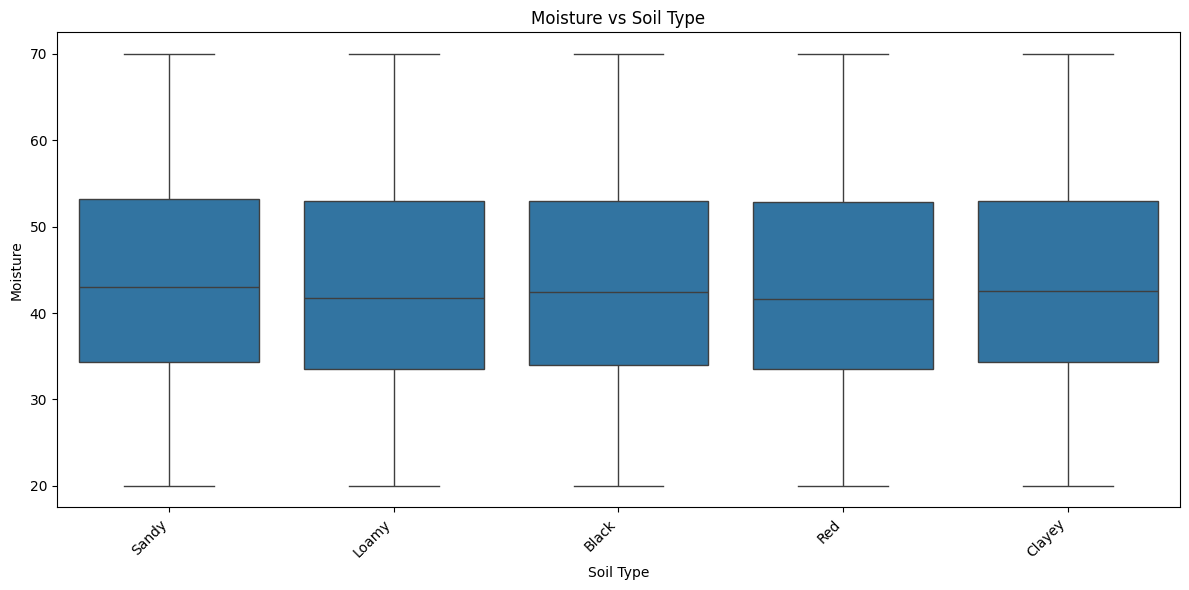

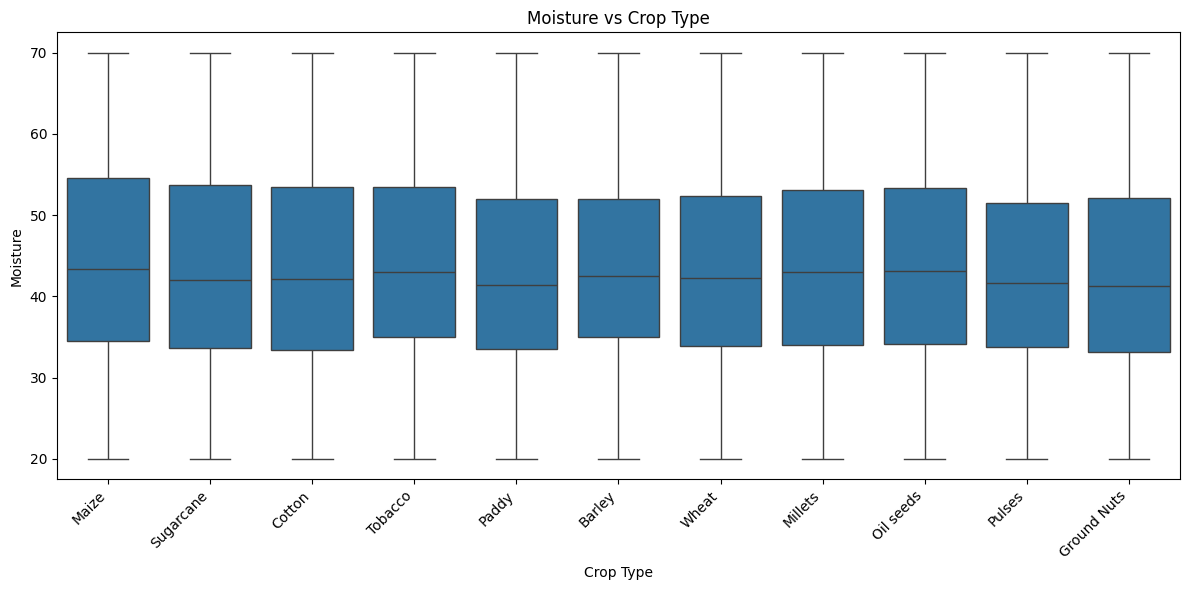

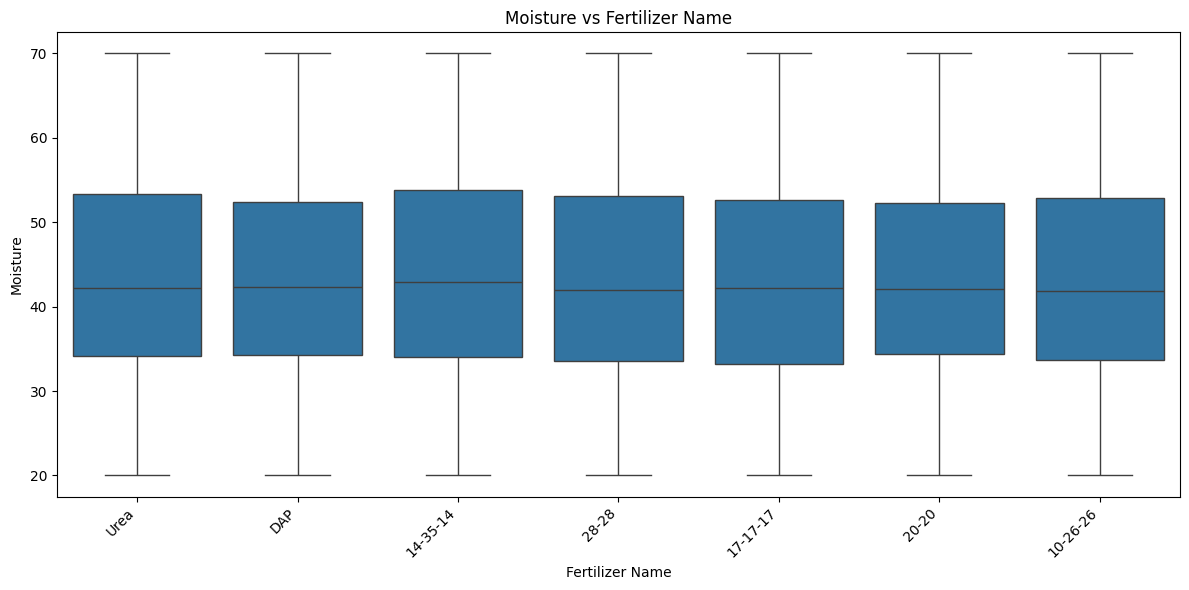

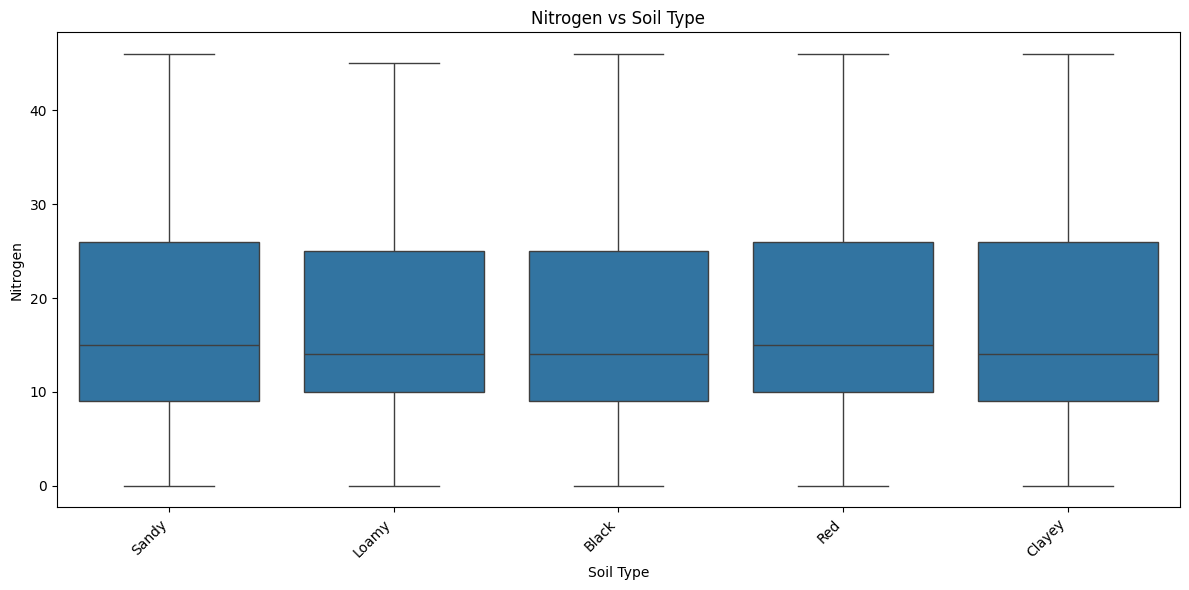

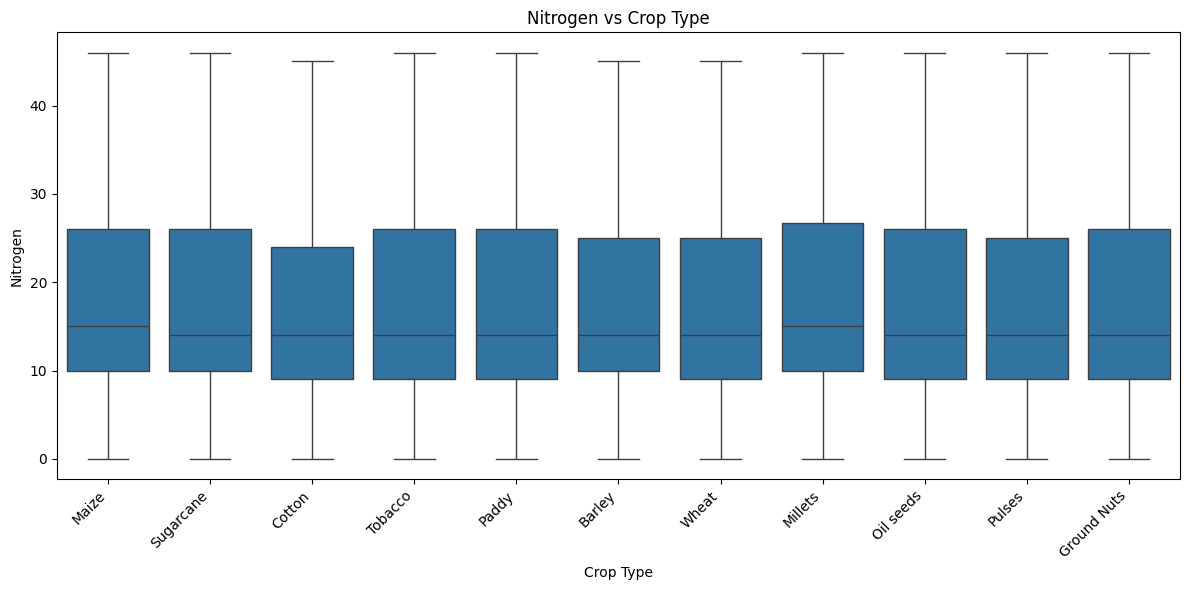

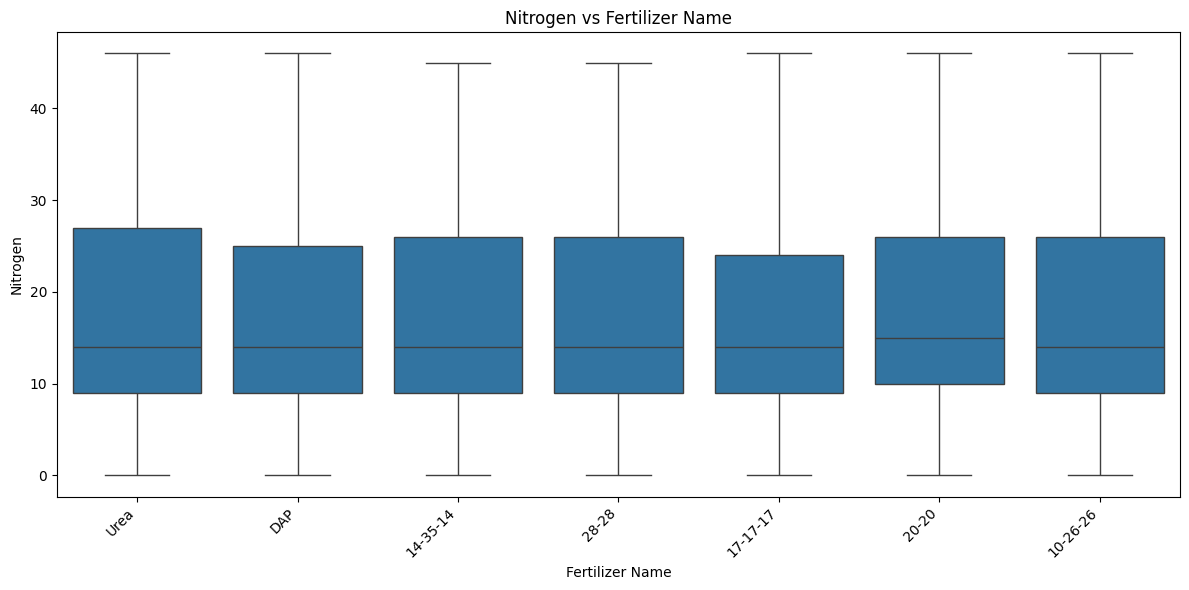

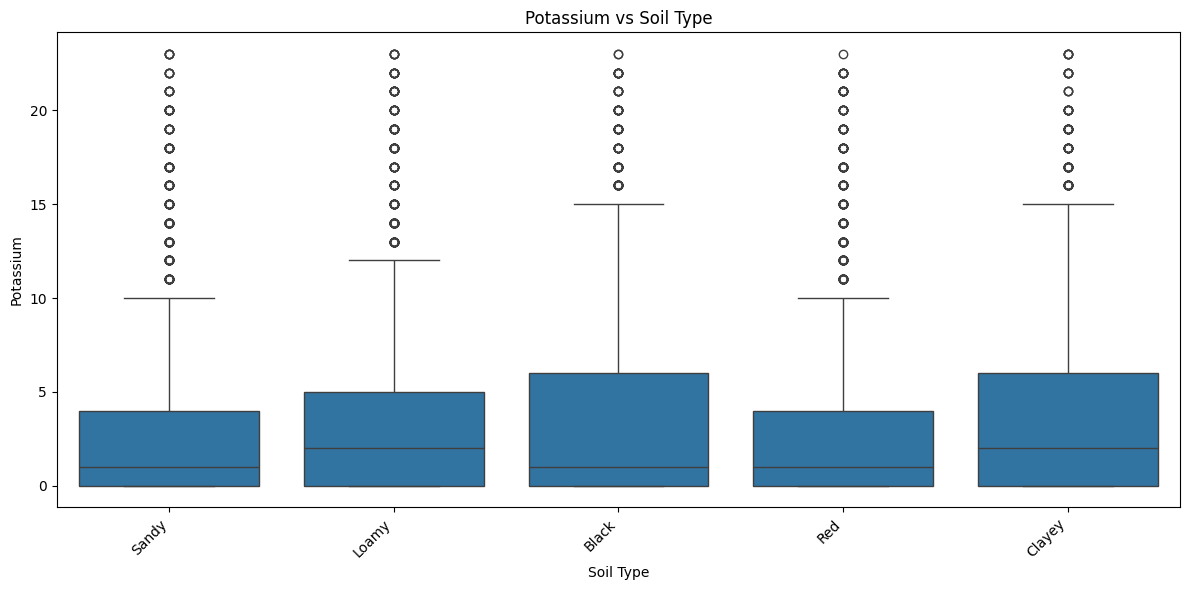

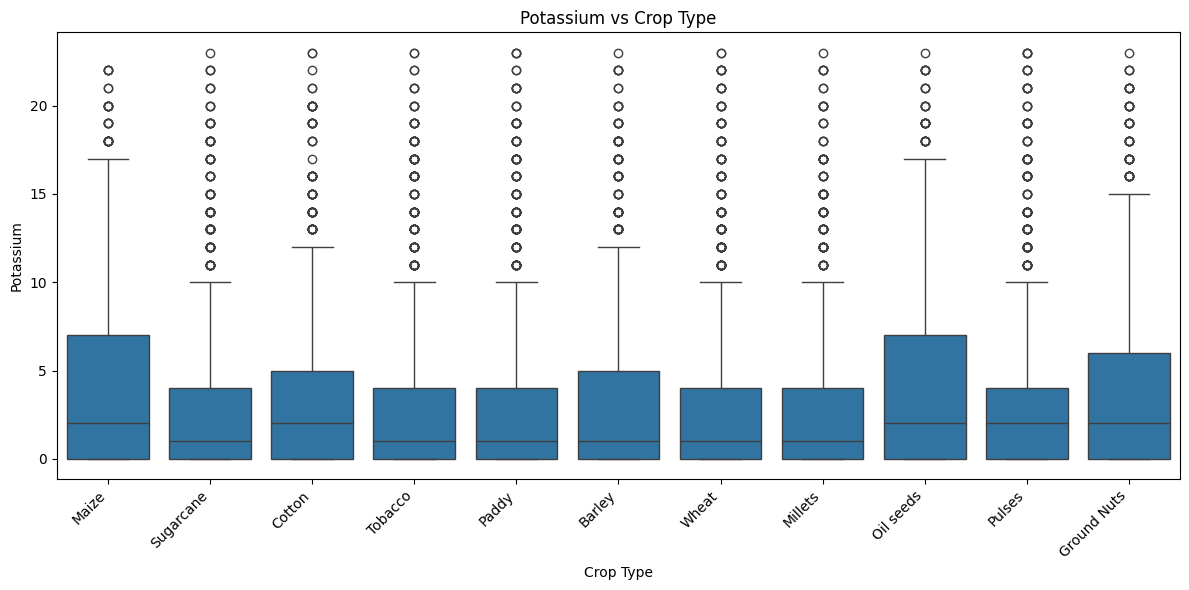

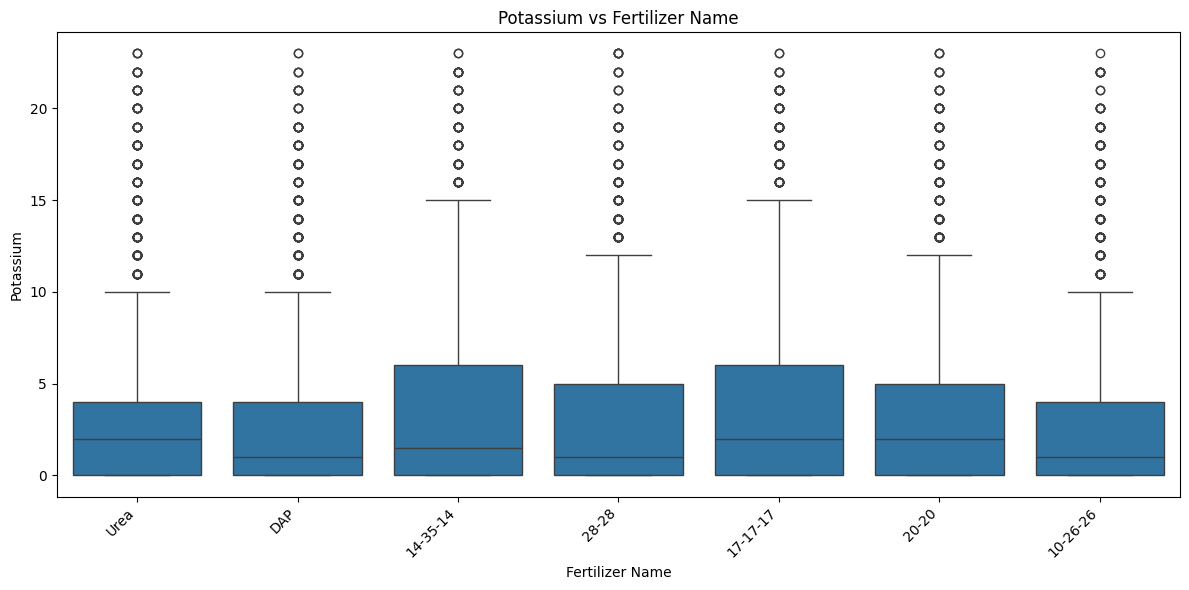

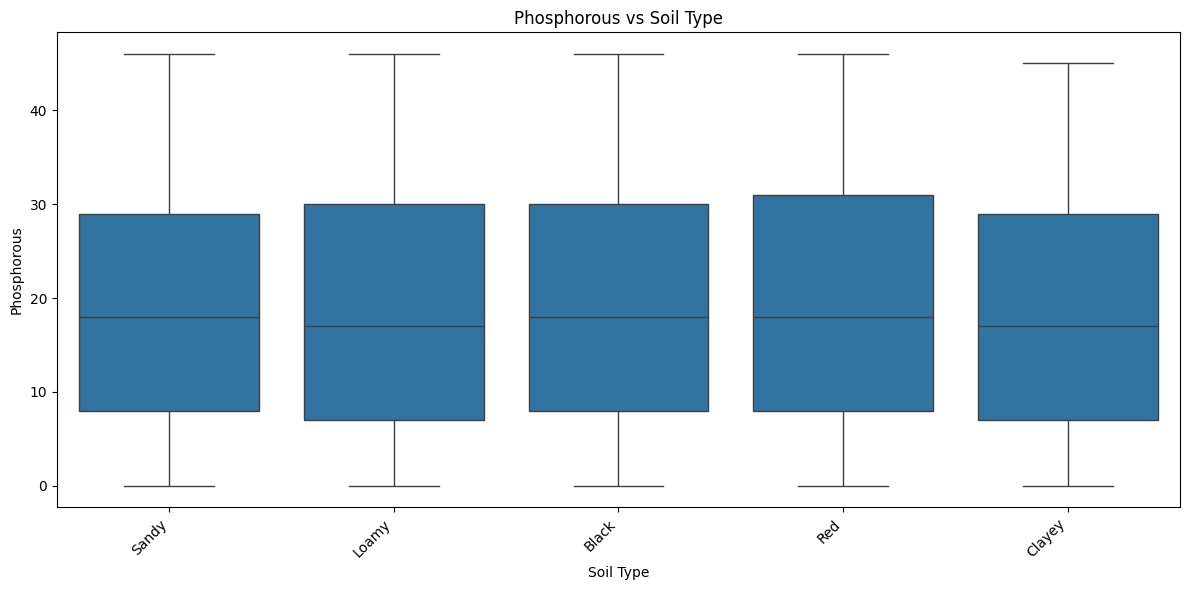

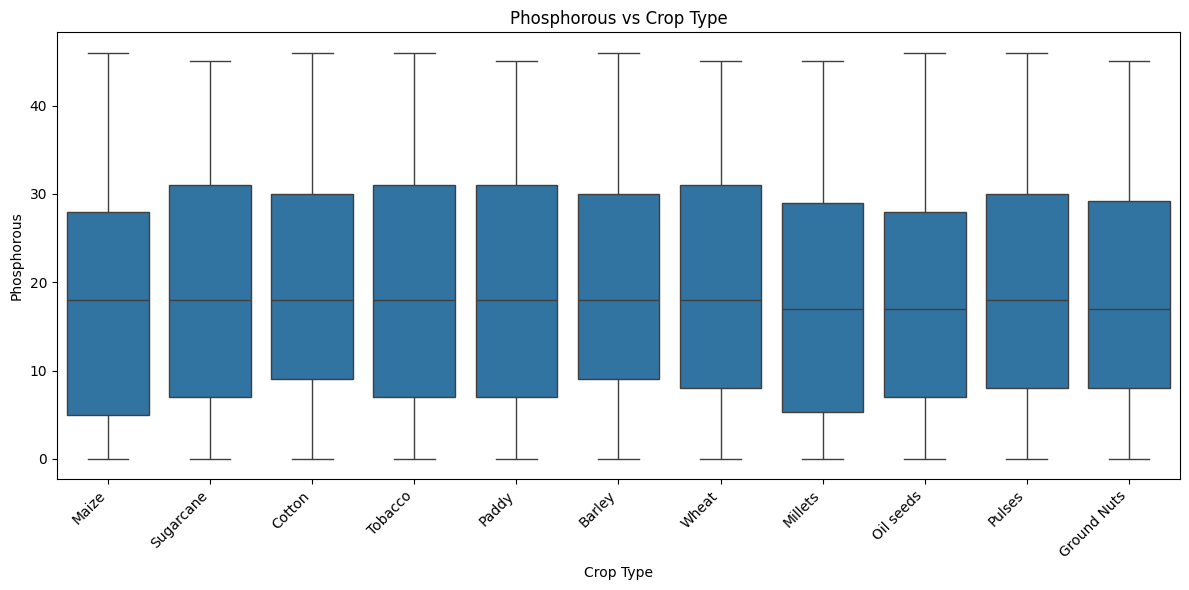

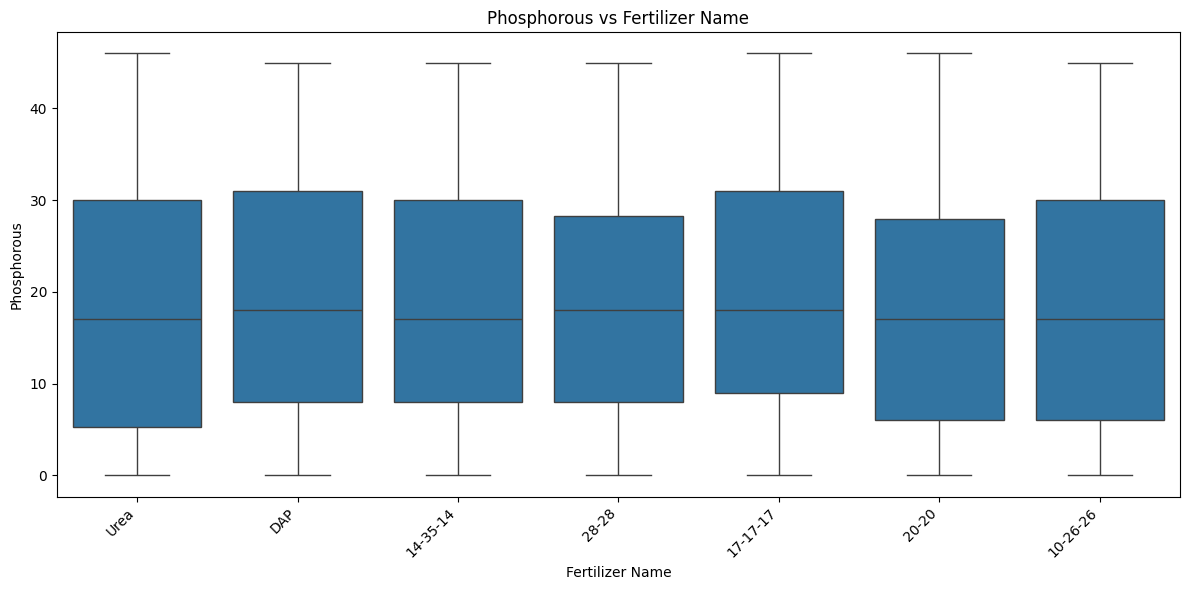

In [ ]:
# relationships between numerical and categorical features using box plots
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

### Analyzing Relationships with the Target Variable ('Fertilizer Name')

Let's explore how the numerical and categorical features relate to the target variable 'Fertilizer Name' to understand which factors might influence fertilizer recommendations.

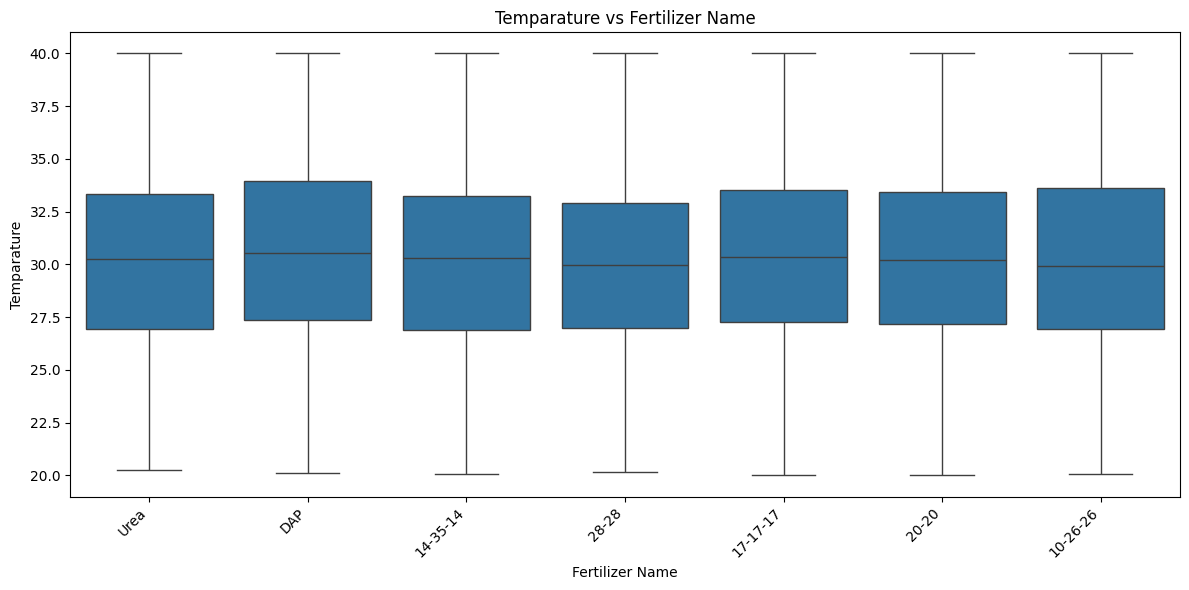

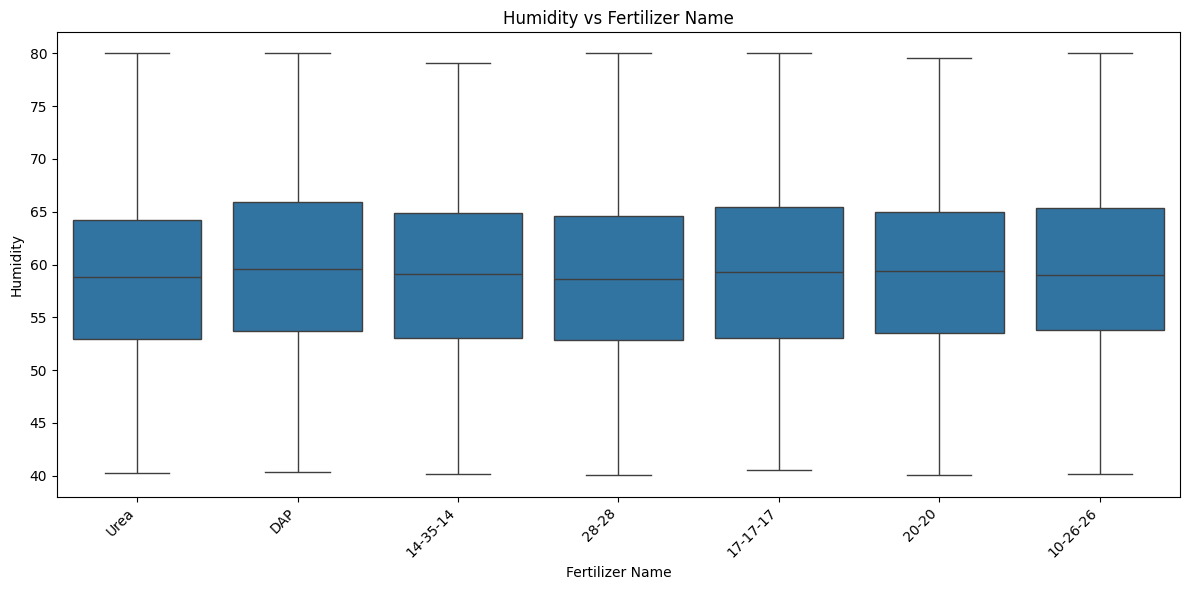

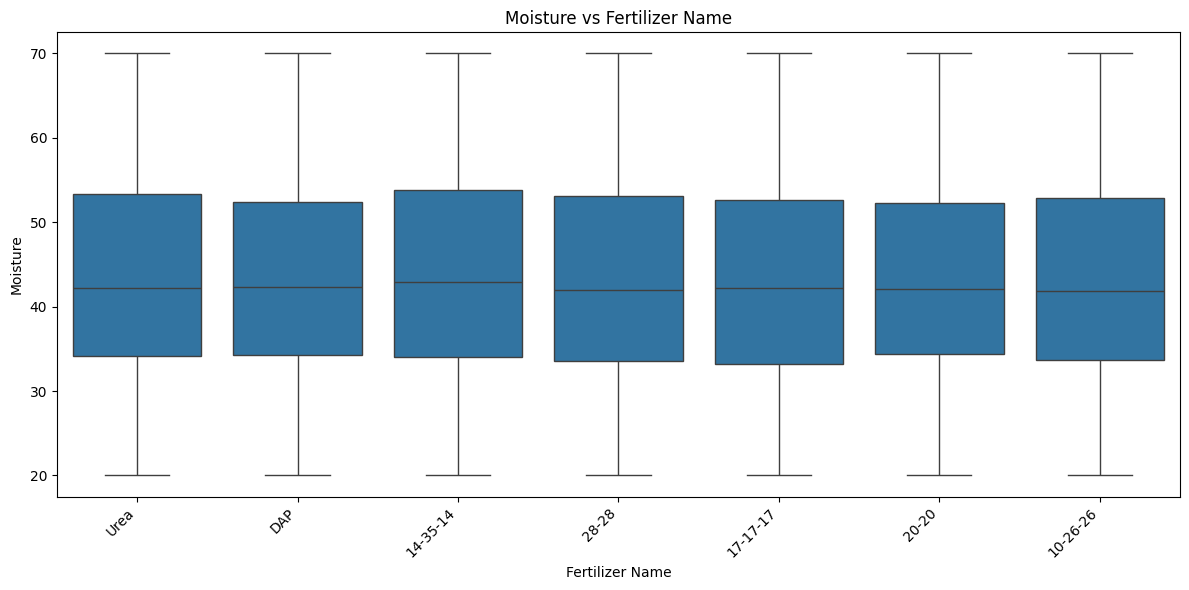

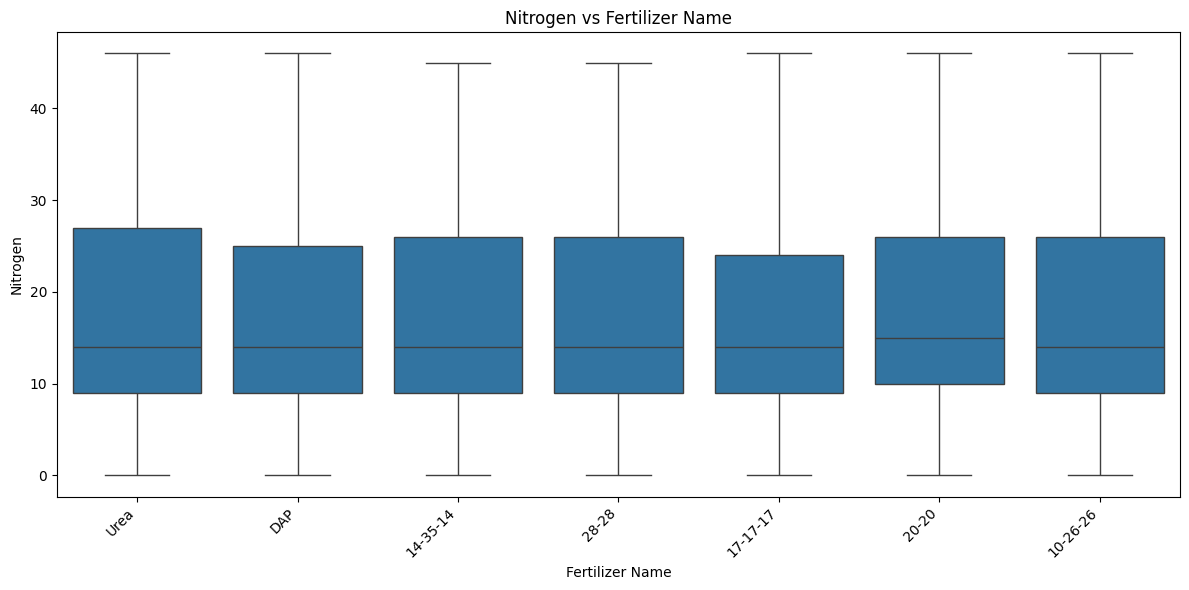

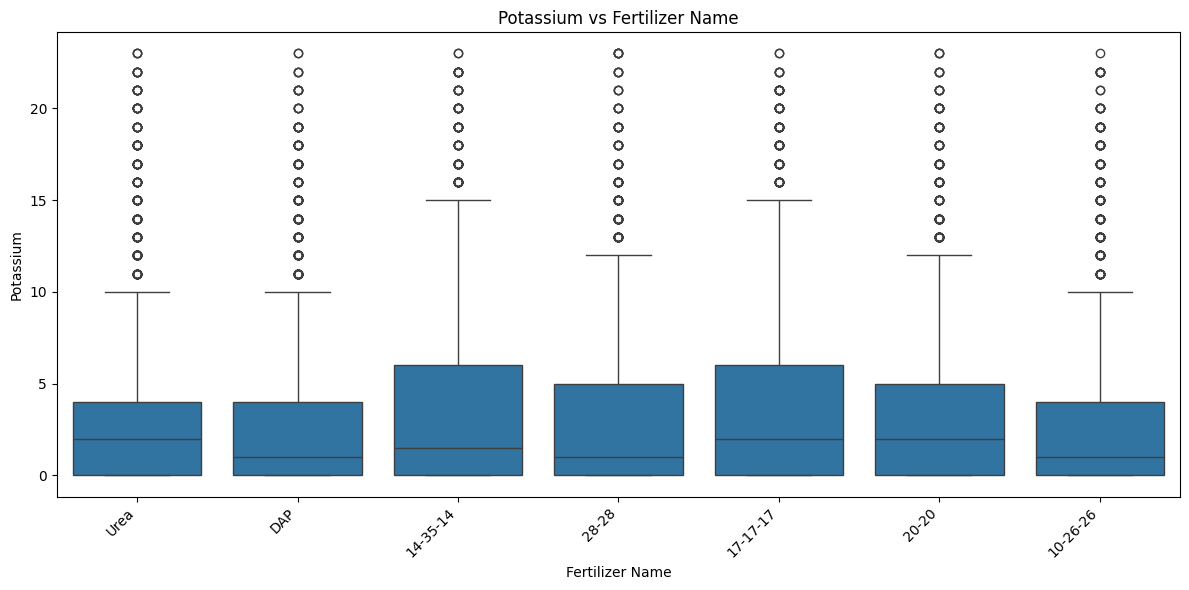

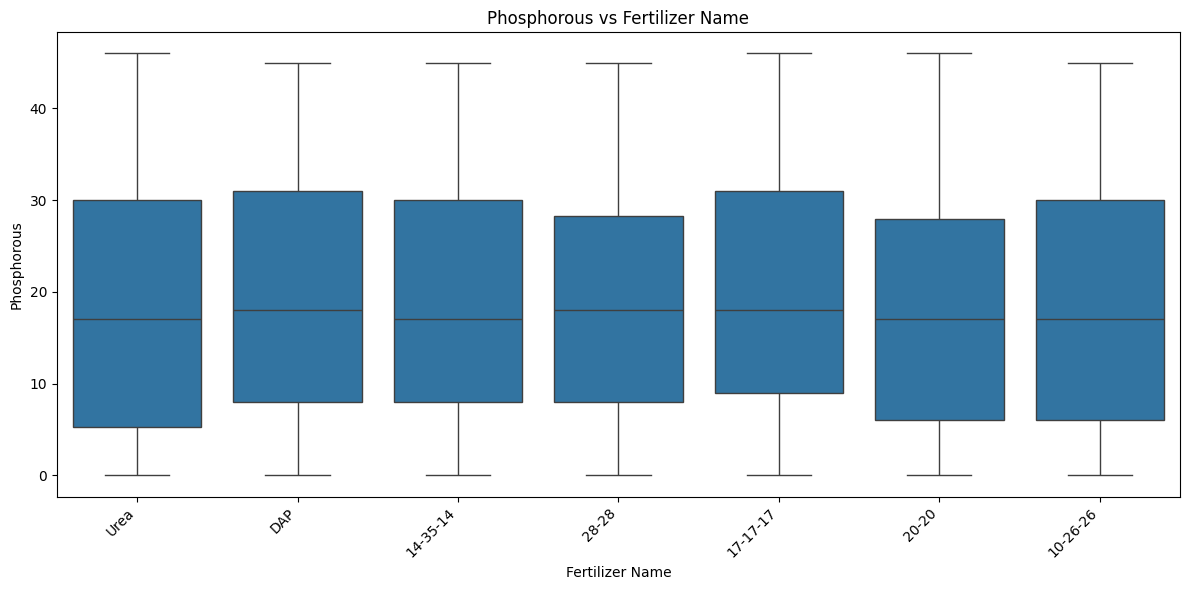

In [ ]:
for num_col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Fertilizer Name', y=num_col)
    plt.title(f'{num_col} vs Fertilizer Name')
    plt.xlabel('Fertilizer Name')
    plt.ylabel(num_col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

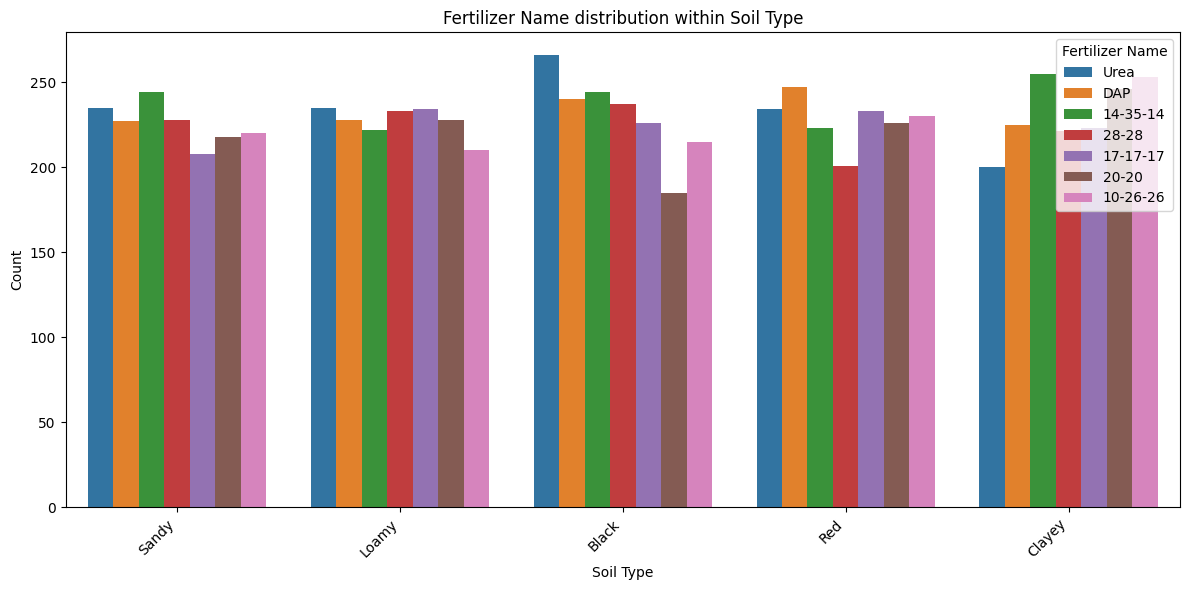

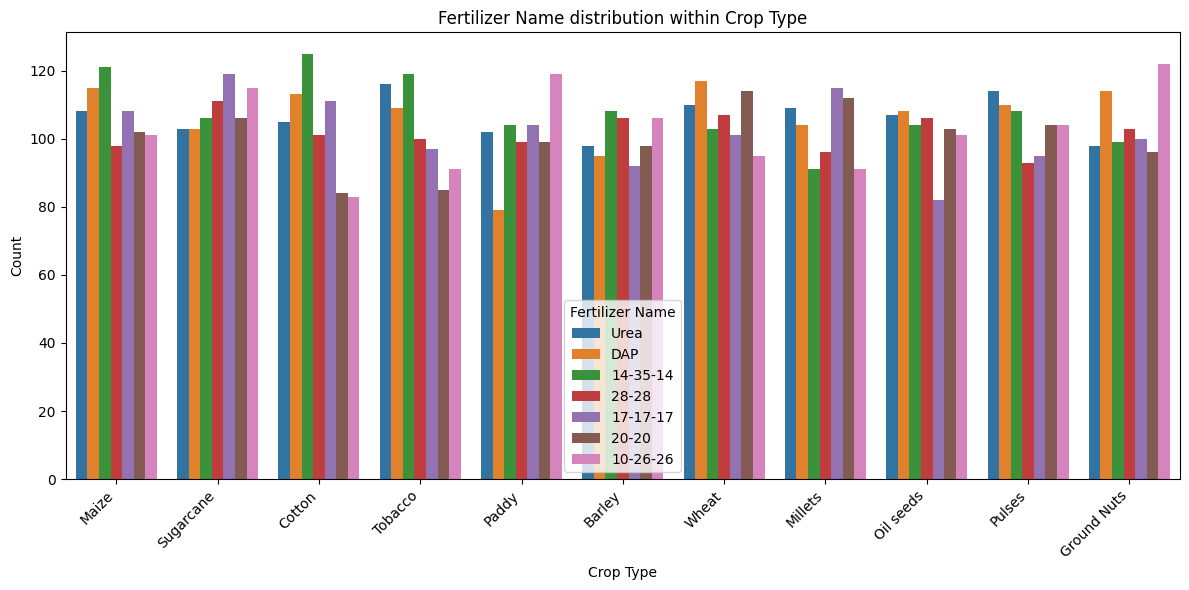

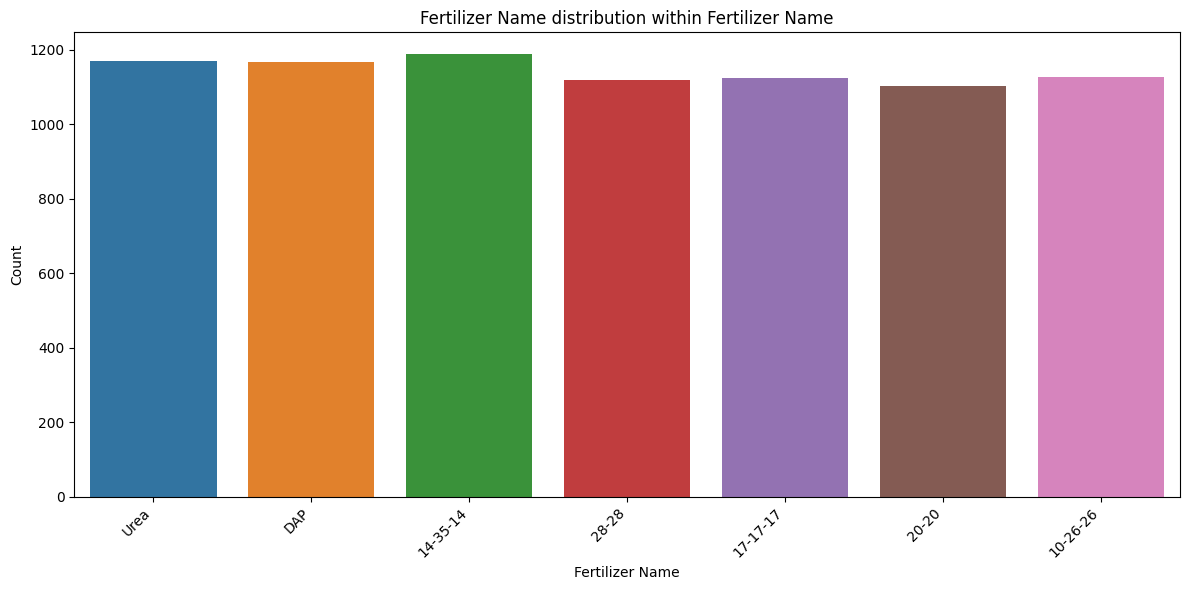

In [ ]:
for cat_col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=cat_col, hue='Fertilizer Name')
    plt.title(f'Fertilizer Name distribution within {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
label_encoder = LabelEncoder()
df['Fertilizer Name Encoded'] = label_encoder.fit_transform(df['Fertilizer Name'])

display(df.head())

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer Name Encoded
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea,6
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP,5
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14,1
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28,4
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea,6


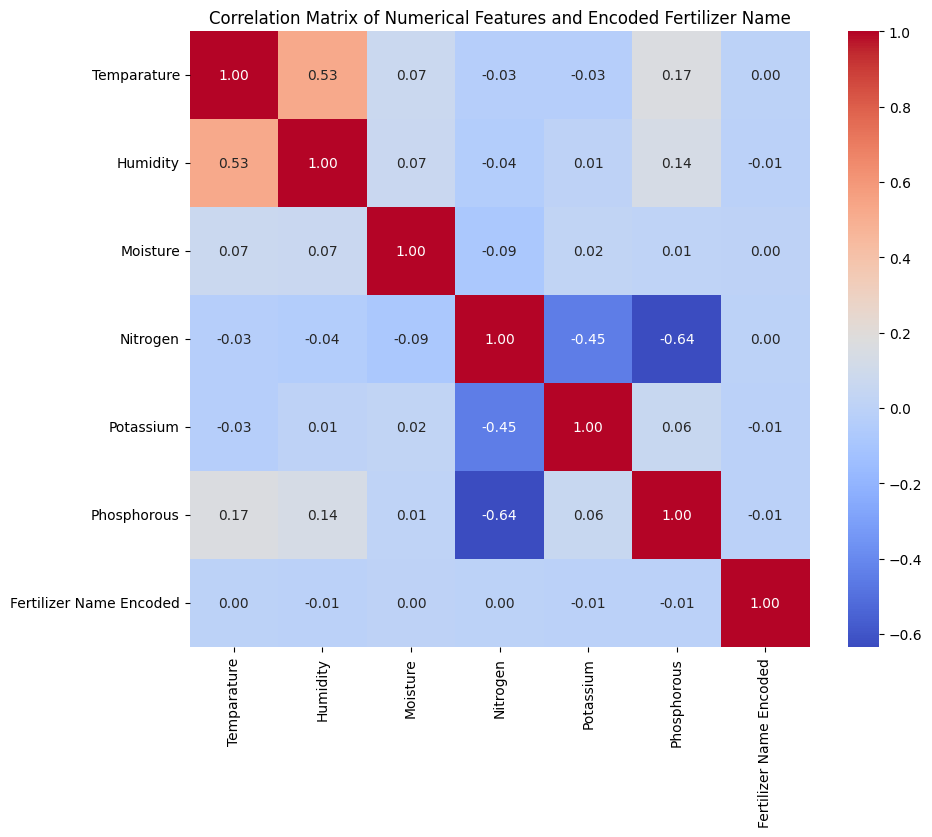

In [ ]:
numerical_and_encoded_cols = numerical_cols.tolist() + ['Fertilizer Name Encoded']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_and_encoded_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Encoded Fertilizer Name')
plt.show()

## Visualization based on Target

In [ ]:
# pairplot of numerical features by --> 'Fertilizer Name'
sns.pairplot(df, vars=numerical_cols, hue='Fertilizer Name')
plt.suptitle('Pairplot of Numerical Features by Fertilizer Name', y=1.02)
plt.show()

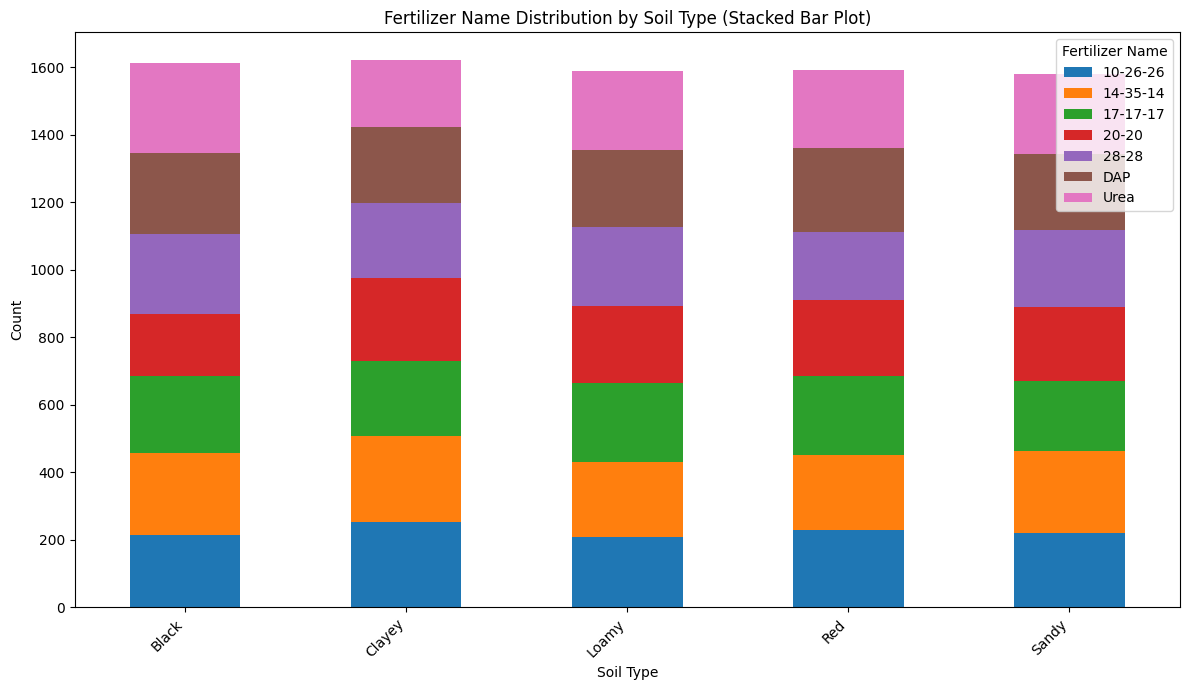

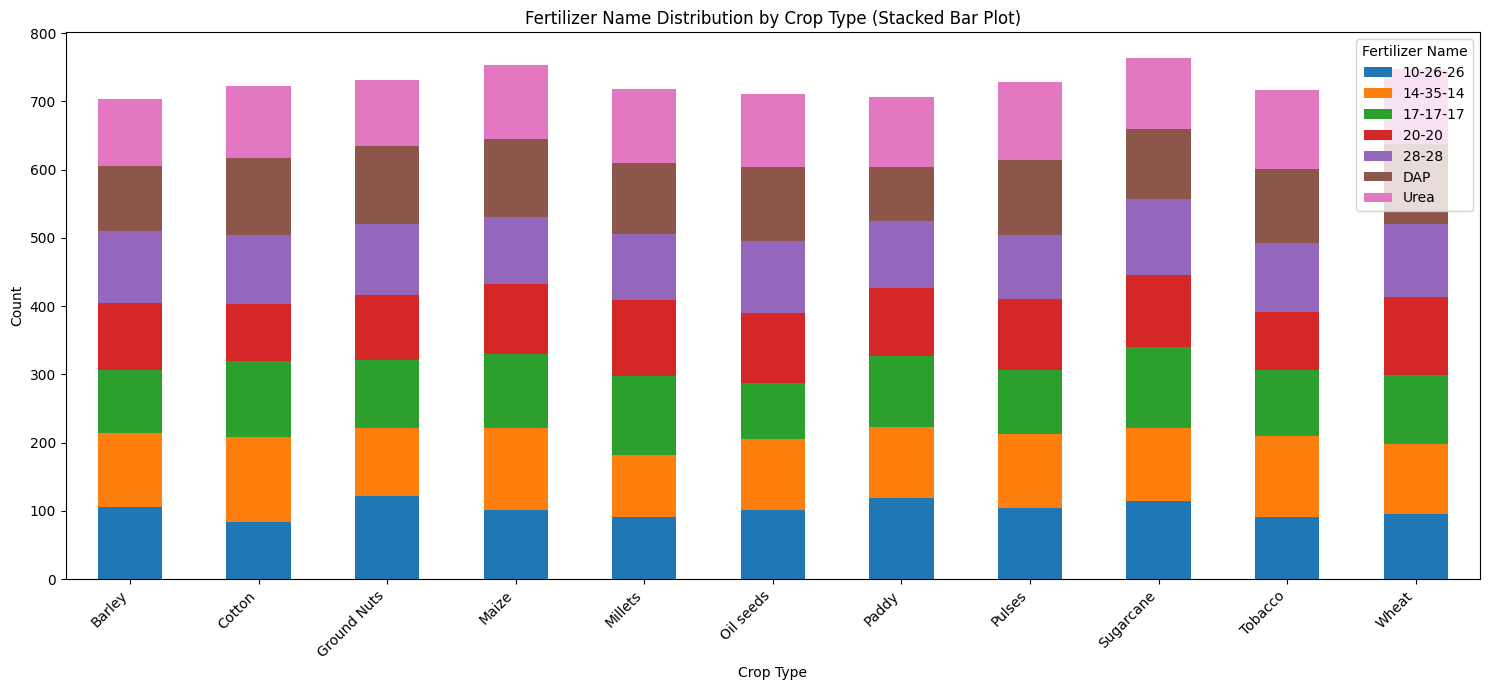

In [ ]:
# interaction between 'Soil Type' and 'Fertilizer Name' using a stacked bar plot
soil_fertilizer_counts = df.groupby(['Soil Type', 'Fertilizer Name']).size().unstack(fill_value=0)
soil_fertilizer_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Fertilizer Name Distribution by Soil Type (Stacked Bar Plot)')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fertilizer Name')
plt.tight_layout()
plt.show()

# interaction between 'Crop Type' and 'Fertilizer Name' using a stacked bar plot
crop_fertilizer_counts = df.groupby(['Crop Type', 'Fertilizer Name']).size().unstack(fill_value=0)
crop_fertilizer_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Fertilizer Name Distribution by Crop Type (Stacked Bar Plot)')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fertilizer Name')
plt.tight_layout()
plt.show()

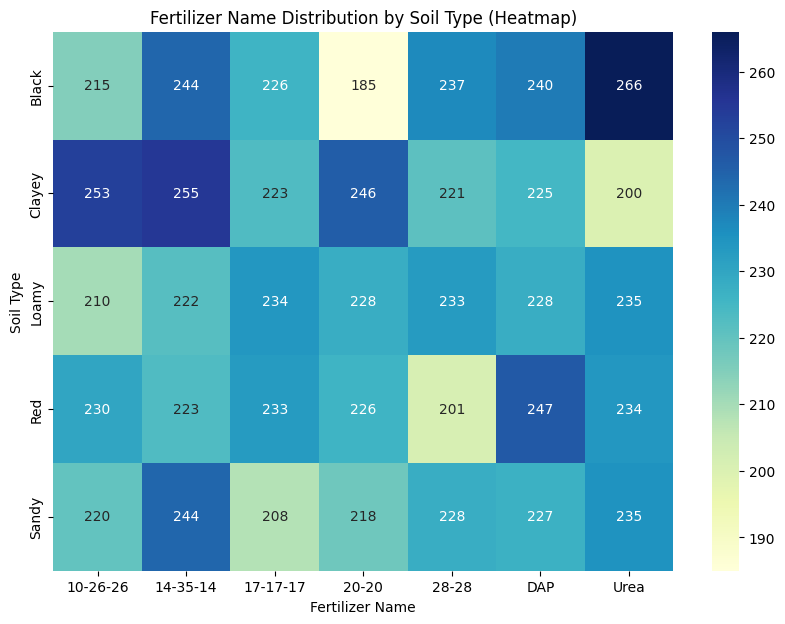

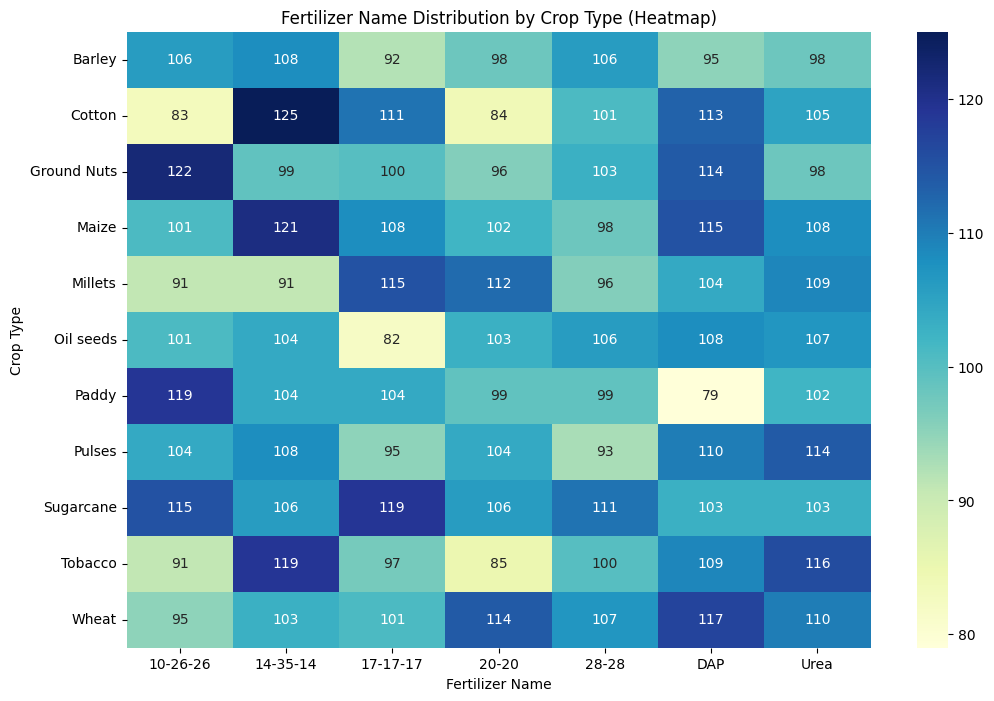

In [ ]:
# interaction between 'Soil Type' and 'Fertilizer Name' using a heatmap
soil_fertilizer_pivot = df.pivot_table(index='Soil Type', columns='Fertilizer Name', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 7))
sns.heatmap(soil_fertilizer_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Fertilizer Name Distribution by Soil Type (Heatmap)')
plt.xlabel('Fertilizer Name')
plt.ylabel('Soil Type')
plt.show()

# interaction between 'Crop Type' and 'Fertilizer Name' using a heatmap
crop_fertilizer_pivot = df.pivot_table(index='Crop Type', columns='Fertilizer Name', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(crop_fertilizer_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Fertilizer Name Distribution by Crop Type (Heatmap)')
plt.xlabel('Fertilizer Name')
plt.ylabel('Crop Type')
plt.show()

### Insights?

*   **Distribusi Fitur Numerik:** Distribusi fitur numerik seperti Suhu, Kelembaban, Kelembaban Tanah, Nitrogen, Kalium, dan Fosfor bervariasi, tetapi secara umum menunjukkan sebaran yang masuk akal dalam rentang data.
*   **Distribusi Fitur Kategorikal:** Fitur kategorikal seperti Jenis Tanah, Jenis Tanaman, dan Nama Pupuk memiliki distribusi yang relatif merata di antara kategori-kategorinya, menunjukkan keseimbangan dalam dataset untuk analisis lebih lanjut.
*   **Korelasi Fitur Numerik:** Matriks korelasi menunjukkan hubungan yang bervariasi antara fitur-fitur numerik. Penting untuk dicatat korelasi antara fitur-fitur ini saat mempertimbangkan model prediktif di masa mendatang.
*   **Hubungan Fitur Numerik dengan Nama Pupuk:** Box plot menunjukkan bagaimana distribusi fitur numerik berbeda untuk setiap jenis pupuk. Ini mengindikasikan bahwa tingkat Suhu, Kelembaban, Kelembaban Tanah, Nitrogen, Kalium, dan Fosfor dapat menjadi indikator penting untuk jenis pupuk yang direkomendasikan.
*   **Hubungan Fitur Kategorikal dengan Nama Pupuk:** Count plot dan heatmap menunjukkan bagaimana distribusi Nama Pupuk bervariasi di antara Jenis Tanah dan Jenis Tanaman yang berbeda. Beberapa jenis tanah dan tanaman mungkin lebih sering menggunakan jenis pupuk tertentu, menyoroti interaksi antara faktor-faktor ini.